## PHAS0102 Assignment 1 - Matrix Multiplication in Numba

### Student Number: 19008330

Grade: 19/20 (95%)

# Part 1 Objectives

- 1.1. Desgining a ``faster_matrix_product`` that computes the product of two matrixes more efficiently than the ``slow_matrix_product``

- 1.2. Explaining why my function is better than the ``slow_matrix_product`` 

- 1.3. Write a function that runs the two functions for matrices of a range of sizes and usematplotlib to create a plot showing the time taken for ``slow_matrix_product`` to ``faster_matrix_product``. 

### 1.1 - Faster Matrix Multiplication

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, njit
from timeit import timeit

In [17]:
# The Slow Matrix Product from the Assignment Sheet

def slow_matrix_product(mat1, mat2):
    assert mat1.shape[1] == mat2.shape[0]
    result = []
    for c in range(mat2.shape[1]):
        column = []
        for r in range(mat1.shape[0]):
            value = 0
            for i in range(mat1.shape[1]):
                value += mat1[r, i] * mat2[i, c]
            column.append(value)
        result.append(column)
    return np.array(result).transpose()


# Faster matrix multiplication function

def faster_matrix_product(m1,m2):
    assert m1.shape[1] == m2.shape[0]
    product = np.zeros(shape = (m1.shape[0], m2.shape[1]))
    m2 = m2.transpose()
    '''
     Product matrix must  have the shape of the first matrix's
     rows and the second matrix's columns.
    '''
    for c in range(m2.shape[0]):
        product[c] = np.dot(m1,m2[c])
    '''
    I previously used two for loops and took elements of the 
    second matrix in the loop. However, just taking the elements
    over the first row and projecting it onto the second also seemed 
    to work and obtain the correct matrix.
    '''
    return product.transpose()

# Creating a range of values for the dimension of the matrix
test_dimes = range(2,6)
for n in test_dimes:
    m1 = np.random.rand(n,n)
    m2 = np.random.rand(n,n)
    # Ensuring both matrix product functions obtains the correct matrix product
    assert np.allclose(slow_matrix_product(m1, m2), m1 @ m2)
    assert np.allclose(faster_matrix_product(m1, m2), m1 @ m2)



### 1.2 Explaining why my function is better.

A combination of the ``assert`` statemenet and ``np.allclose()`` function demonstrate that the ``faster_matrix_product`` function correctly computes the product of two matrices. 

The ``faster_matrix_product`` is superior to the ``slow_matrix_product`` for the following reasons: 

1. ``faster_matrix_product`` utilises one for loop in with the ``np.dot()`` function which is significantly faster than executing three for loops to operate one component at a time for each row on matrix 1 and each column on matrix 2. This would result in the computation being of order $\mathbb{O}(n)$ instead of $\mathbb{O}(n^{3})$, where the exponent represents the number of for loops.

2. The ``np.dot()`` within the inner for loop of the ``faster_matrix_product`` computes the product the matrix product each column at a time instead of each component at a time from matrix 1 and matrix 2, which is shown to be significantly faster than the ``slow_matrix_product``.





### 1.3 Writing a function to determine runtime for each function and demonstrating the difference via a plot

In [3]:
# I've used a nested function to allow for the matrix product functions to be
# written as arguments within the timing function. This uses the inbuilt timit 
# function 

def func_time(operator,runs,style):
    def time_run(operator,m1,m2,runs):
        assign = {'slow_matrix_product' : slow_matrix_product , 
        'faster_matrix_product' : faster_matrix_product, 
        'm1': m1, 'm2': m2}
        '''
        I've used a nested function in addition to a lambda function
        to allow for the matrix product functions to be accepted as
        arguments within the timing function. An argument for the number
        of runs has also been included to obtain an effective average runtime
        if the function is fast enough to compute it.
        '''
        return timeit(lambda: operator(m1,m2), number = runs, globals = assign)
        
    dimes = np.array([1,2,5,10,20,50,100,200,300,400,500,600,700,800,900,1000])
    
    """ 
    Entering the number of dimensions of an n x n matrix
    as an array of values for np.random.rand(n,n) to collect the time
    taken for the functions to compute the matrix product. 
    """
    
    output = []
    for n in dimes:
        m1 = np.random.rand(n,n)
        m2 = np.random.rand(n,n)
        fm1 = np.asfortranarray(m1)
        fm2 = np.asfortranarray(m2) 

        '''I've designed this function to also easily deal with
        matrix transformations regardless of array ordering. The style
        argument allows us to chose the ordering. '''
        
        if style == "cc":
            if runs == 0:
                break
            if runs == 1:
                output.append(time_run(operator,m1,m2,runs))
            elif runs > 1:
                output.append(time_run(operator,m1,m2,runs)/runs) 
        
        if style == "fc":
            if runs == 0:
                break
            if runs == 1:
                output.append(time_run(operator,fm1,m2,runs))
            elif runs > 1:
                output.append(time_run(operator,fm1,m2,runs)/runs)
        
        if style == "cf":
            if runs == 0:
                break
            if runs == 1:
                output.append(time_run(operator,m1,fm2,runs))
            elif runs > 1:
                output.append(time_run(operator,m1,fm2,runs)/runs)
        
        if style == "ff":
            if runs == 0:
                break
            if runs == 1:
                output.append(time_run(operator,fm1,fm2,runs))
            elif runs > 1:
                output.append(time_run(operator,fm1,fm2,runs)/runs)       
    return np.array(output)


# The n x n sized matrices I want to analyse in dataset. 
dimes_array = np.array([1,2,5,10,20,50,100,200,300,400,500,600,700,800,900,1000])
dimes = dimes_array.tolist()

In [8]:
tf = func_time(faster_matrix_product,100,"cc")
ts = func_time(slow_matrix_product,1,"cc")

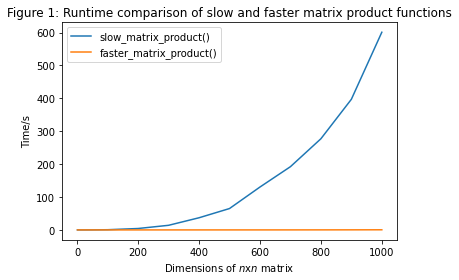

In [9]:
# Now to plot the runtime comparison of both functions

plt.plot(dimes, ts)
plt.plot(dimes, tf)
plt.xlabel("Dimensions of $n$x$n$ matrix")
plt.ylabel("Time/s")
plt.title("Figure 1: Runtime comparison of slow and faster matrix product functions")
plt.legend(['slow_matrix_product()', 'faster_matrix_product()'])
plt.show()

As seen by Figure 1, the runtime for the ``faster_matrix_product`` is a fraction of that produced by the ``slow_matrix_product``, unequivocal proof the new function is superior to the ``slow_matrix_product``.

## Part 2: Using Numba to speed up matrix multiplication

#### Objectives

- 2.1 Create a copy of your function faster_matrix_product that is just-in-
time (JIT) compiled using Numba. To demonstrate the speed improvement acheived by using Numba

- 2.2 Make a plot (similar to that you made in
the first part) that shows the times taken to multiply matrices using
faster_matrix_product, faster_matrix_product with Numba JIT compilation, and Numpy (@). Numpy’s matrix-matrix multiplication is highly optimised, so you should not expect to be as fast is it

- 2.3 You may be able to achieve further speed up of your function by adjusting the memory layout used. The function ``np.asfortanarray`` will make a copy of an array that uses Fortran-style ordering. Make a plot that compares the times taken by your JIT compiled function when the inputs have different combinations of C-style and Fortran-style ordering **comment (in 1-2 sentences) on why one of these orderings appears to be fastest that the others.**

### 2.1 JIT compiled ``faster_matrix_product`` in numba
### 2.2 Graph Comparing the ``faster_matrix_product_njit``, ``faster_matrix_product`` and ``numpy_matrix_product``

In [18]:
# Creating a JIT compiled function using Numba

@njit
def faster_matrix_product_njit(m1,m2):
    assert m1.shape[1] == m2.shape[0]
    product = np.zeros(shape = (m1.shape[0], m2.shape[1]))
    m2 = m2.transpose()    
    for c in range(m2.shape[0]):
        product[c] = np.dot(m1,m2[c])
    return product.transpose()

# The optimized @ function in numpy
def numpy_matrix_product(m1,m2):
    return m1 @ m2

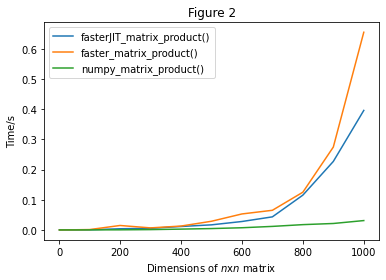

In [20]:
tf_array = func_time(faster_matrix_product,10,"cc")
tfs_array = func_time(faster_matrix_product_njit,10,"cc")
tn_array = func_time(numpy_matrix_product,10,"cc")

tf = tf_array.tolist()
tfs = tfs_array.tolist()
tn = tn_array.tolist()

plt.plot(dimes, tfs)
plt.plot(dimes, tf)
plt.plot(dimes, tn)
plt.xlabel("Dimensions of $n$x$n$ matrix")
plt.ylabel("Time/s")
plt.title("Figure 2")
plt.legend(['fasterJIT_matrix_product()', 'faster_matrix_product()', 'numpy_matrix_product()'])
plt.show()





As can be seen by Figure 2 above, the ``@`` function in python is significantly faster at computing larger matrix products, seeing a slight increase in computation time. The ``faster_matrix_product_njit`` utilises the python accelerator numba and it's seen to be slightly faster than the ``faster_matrix_product`` definer earlier.

### 2.3 Plot comparing different orderings and possible explanations as to why

Within my function ``func_time``, I provided an argument for ``style`` which takes the inputs: "cc", "fc" "cf" and "ff". 

The default array layout from numpy is given as c-sytle ordering, hence the "cc" layout is the default.

"fc" has the first matrix given a fortan-style and the second matrix in a c-style ordering. "cf" has the first matrix given a cstyle and the second matrix in a fortran-style ordering. Finally "ff" is where both matrices are given in a fortran-style ordering. 


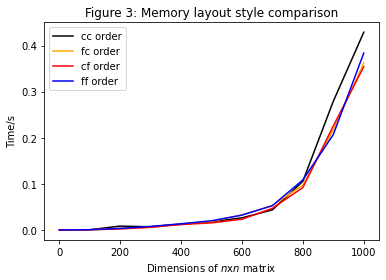

In [22]:
cc_array = func_time(faster_matrix_product_njit,1,"cc")
fc_array = func_time(faster_matrix_product_njit,1,"fc")
cf_array = func_time(faster_matrix_product_njit,1,"cf")
ff_array = func_time(faster_matrix_product_njit,1,"ff")

tcc = cc_array.tolist()
tfc = fc_array.tolist()
tcf = cf_array.tolist()
tff = ff_array.tolist()

plt.plot(dimes, tcc, "black")
plt.plot(dimes, tfc, "orange")
plt.plot(dimes, tcf, "red")
plt.plot(dimes, tff, "blue")

plt.xlabel("Dimensions of $n$x$n$ matrix")
plt.ylabel("Time/s")
plt.title("Figure 3: Memory layout style comparison")
plt.legend(['cc order', 'fc order', 'cf order', 'ff order'])
plt.show()


From Figure 3, one can see the fastest ordering using the ``faster_matrix_product_njit`` are as follows:


1. "cf" 
2. "fc"
3. "ff"
4. "cc"

Arrays are stored in fortran column by column and arrays in C are stored row by row. The "cf" ordering is fastest as the first matrix is stored as row vectors and the second as column, which is preferable ordering when computing the dot product over a whole column, rather than transposing various rows then computing np.dot product.

The marginal differences in runtime between the four functions is a testament to the effectiveness of numba as a python accelerator. 





Final Grade = 19/20 = 95%